Part 2. HW
1) Part 1의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기

2) BDA 1.3 Exercise
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0&lt;p&lt;1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes.

3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.

3-a) Beta distribution으로 위의 belief을 survival rate에 관한 prior distribution으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? (Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)

3-b) 이제 data gathering. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 Posterior Distribution 구하기.

3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.pyplot as plt
from random import random
import inspect

In [2]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

In [3]:
def plotPriorLikelihood(n, y, a0, b0, likelihood_scale=10**4):
    # Likelihood : binomial distribution(n, y)

    # Prior : beta distribution(a0, b0)
    prior = st.beta(a=a0, b=b0)

    # Posterior
    post = st.beta(a=a0+n, b=b0+(n-y))

    # plotting
    thetas = np.linspace(0, 1, 300)
    plt.figure(figsize=(8, 6))
    plt.style.use('ggplot')
    plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    
    ## 원래는 likelihood 앞에 아무것도 붙이면 안되지만 시각적 확인을 위해 어쩔 수 없이 붙인다.
    plt.plot(thetas, likelihood_scale*likelihood(thetas, n, y), label='Likelihood', c='orange')
    plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    plt.xlim([-0.10, 1.10])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.legend();

### 1번 case) Strong likelihood & uninformative prior

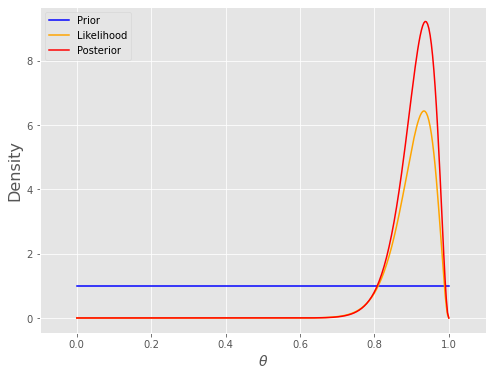

In [4]:
plotPriorLikelihood(n=30, y=28, a0=1, b0=1)

### 2번 case) Strong likelihood & Weak prior


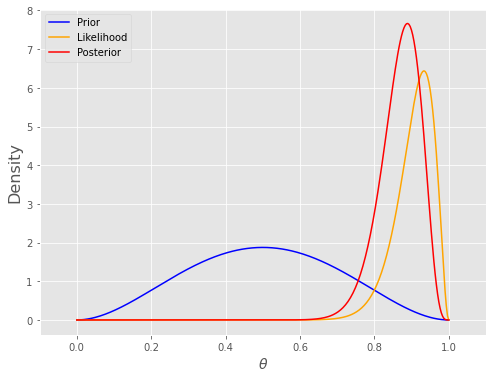

In [5]:
plotPriorLikelihood(n=30, y=28, a0=3, b0=3)

### 3번 case) Strong likelihood & Strong prior


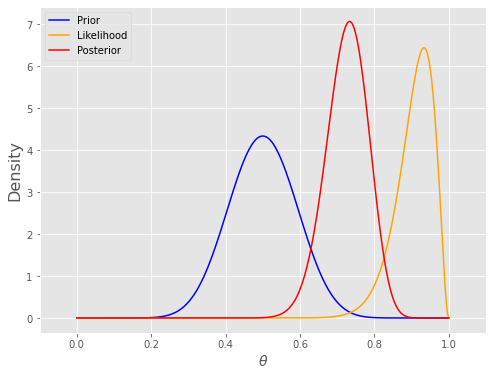

In [6]:
plotPriorLikelihood(n=30, y=28, a0=15, b0=15)

### 4번 case) Weak likelihood & uninformative prior

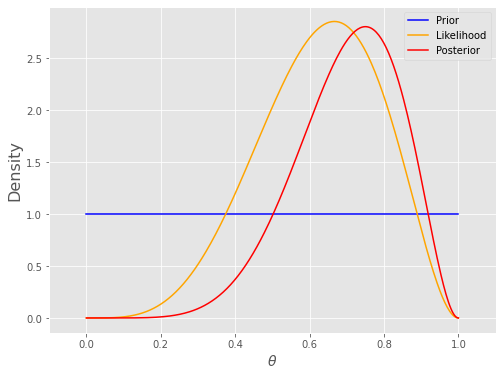

In [7]:
plotPriorLikelihood(n=6, y=4, a0=1, b0=1, likelihood_scale=130)

### 5번 case)  Weak likelihood & Weak prior

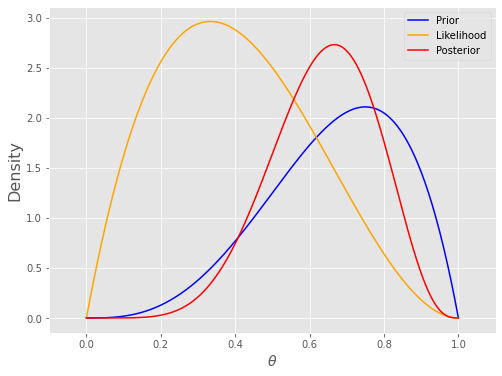

In [8]:

plotPriorLikelihood(n=3, y=1, a0=4, b0=2, likelihood_scale=20)

### 6번 케이스. Weak likelihood & Strong prior

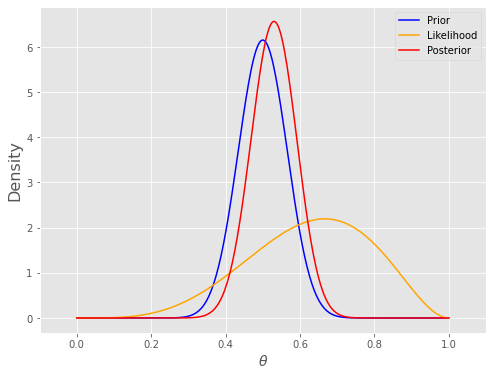

In [9]:
plotPriorLikelihood(n=6, y=4, a0=30, b0=30, likelihood_scale=100)

---------------

### BDA exercise

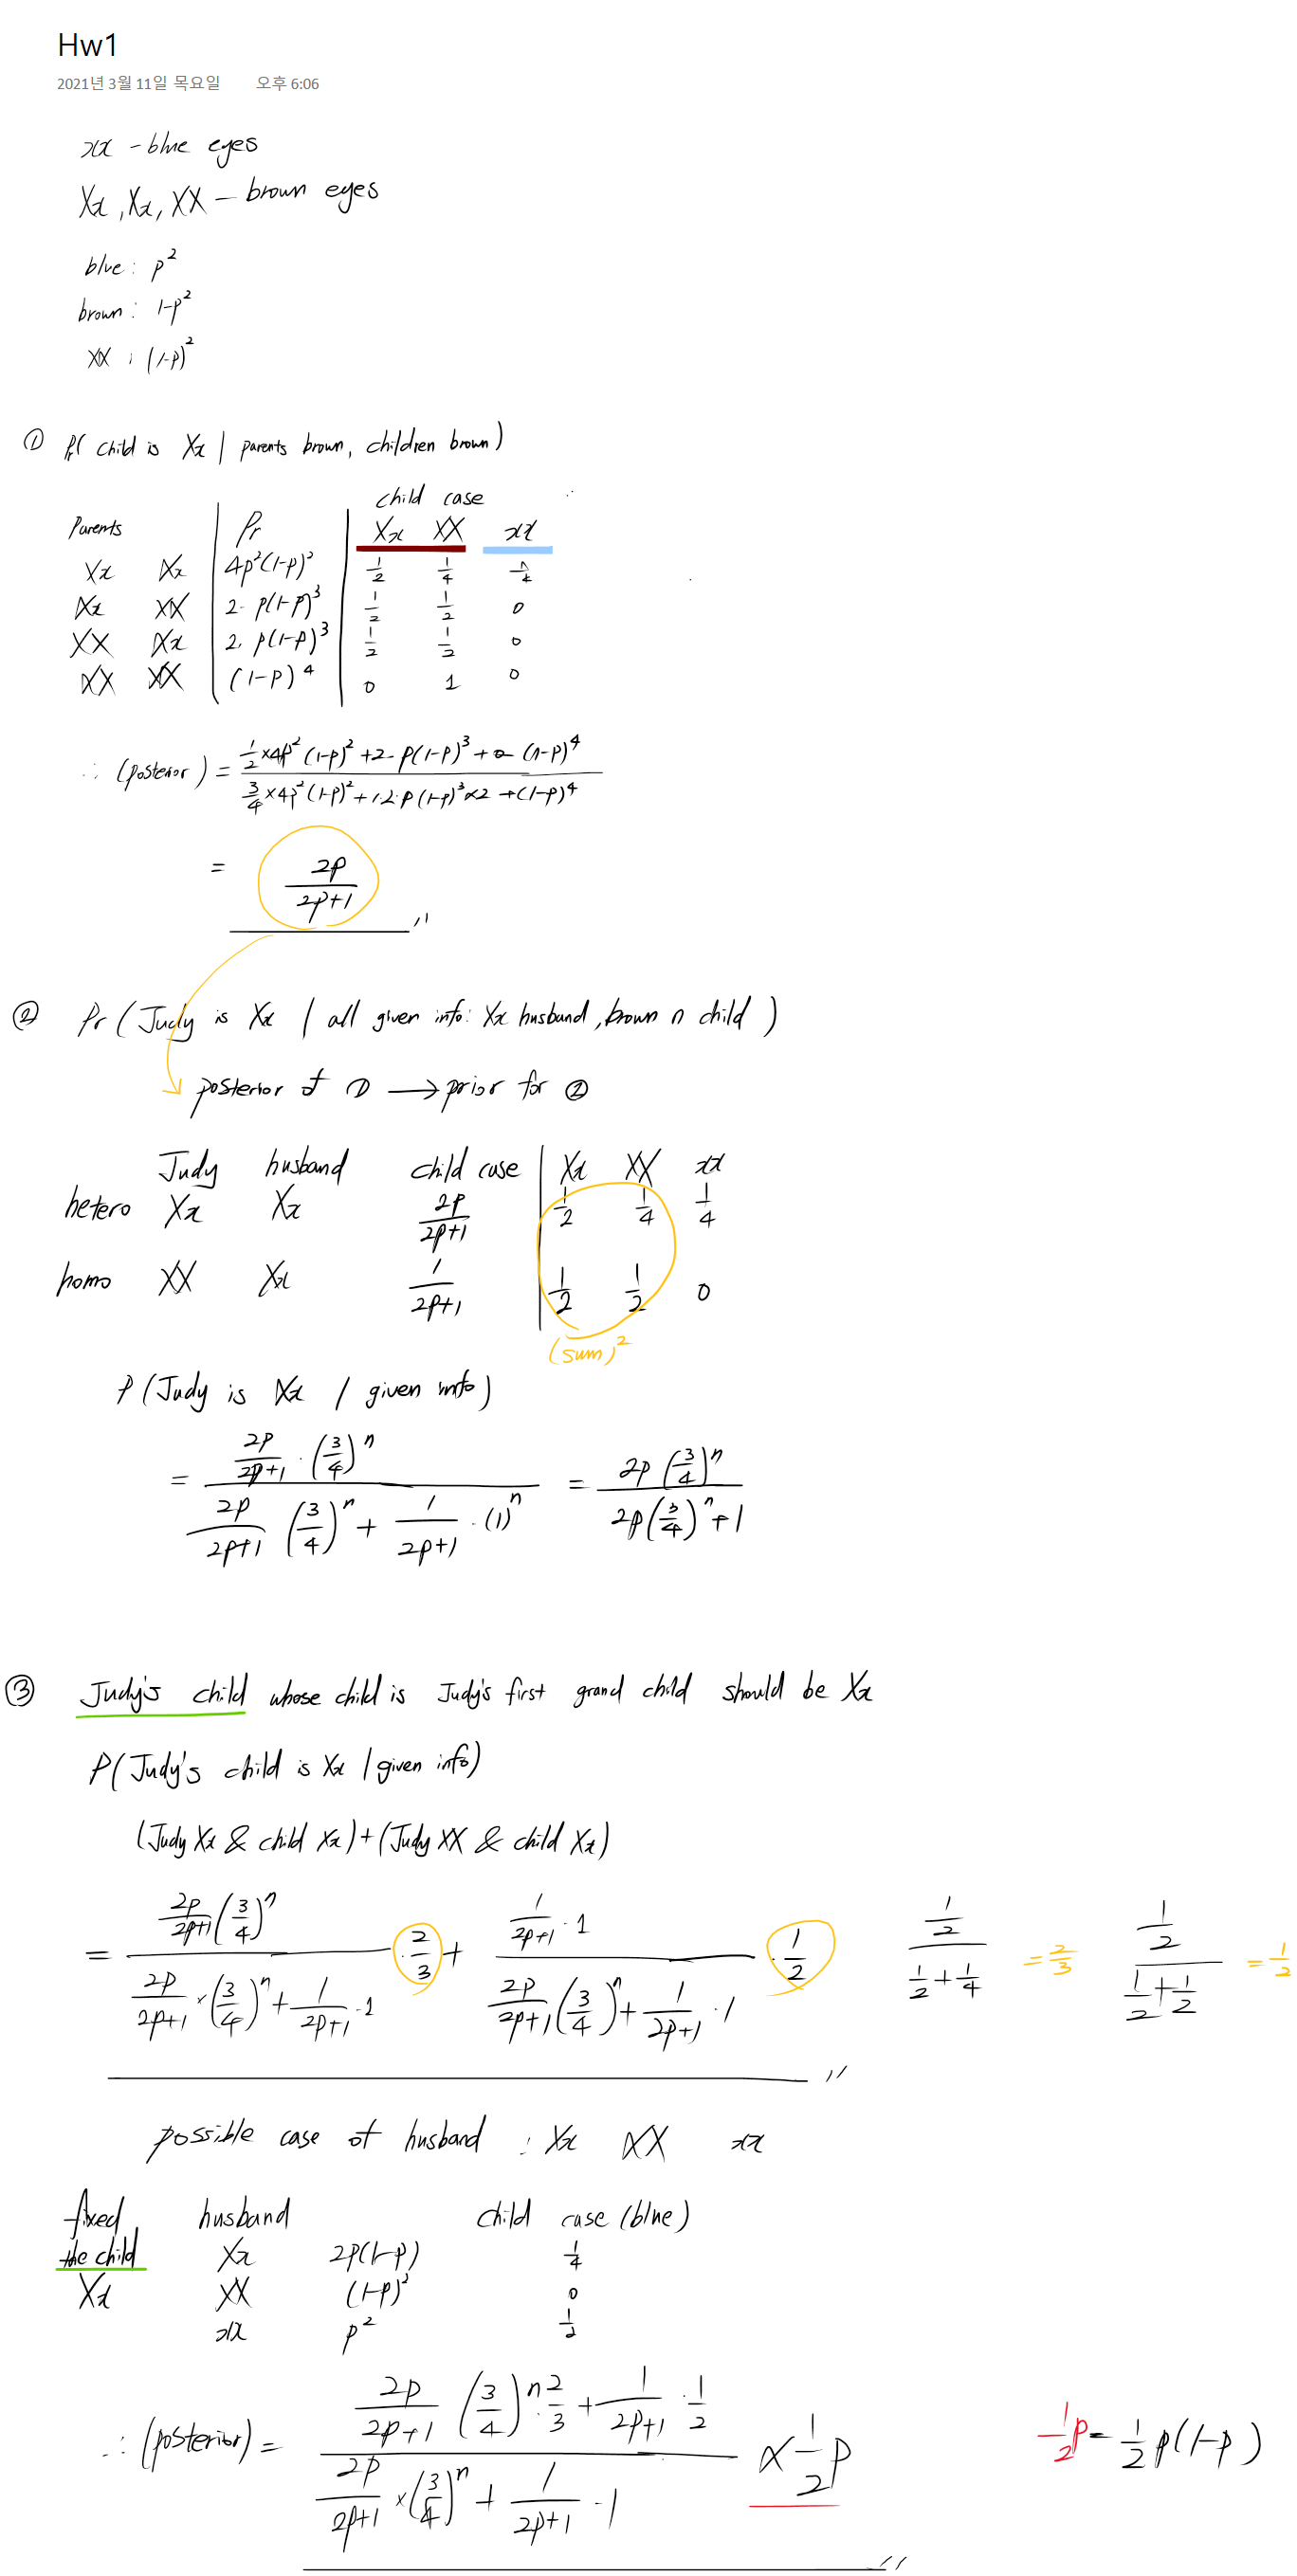

---------

### #3

Beta distribution으로 위의 belief를 survival rate에 관한 prior distribution으로 나타내라. Parameter α,β는 어떻게 선정하면 좋을 것인가?

In [20]:
#확률 구하기
i = 4.5
result = round(st.beta.cdf(0.97, 9*i, i) - st.beta.cdf(0.80, 9*i, i), 3)
result

0.952

In [13]:
prior = st.beta(9*i, i)

In [14]:
st.beta(9*i+10, i+10-10).mean()

NameError: name 'k' is not defined

In [16]:
from scipy.special import gamma

In [24]:

ca_0 = (gamma(9*i+10 + i+10-10)*gamma(9*i+10+20))/(gamma(9*i+10)*gamma(9*i+10 + i+10-10 + 20))

ca_1 = (gamma(9*i+10 + i+10-10)*gamma(9*i+10+19)*gamma(i+10-10+1))/(gamma(9*i+10)*gamma(i+10-10)*gamma(9*i+10 + i+10-10 + 20))

answer_3 = round(1 - ca_0 - 20*ca_1, 3)
answer_3

0.467

1-p(한명 사망) - p(사망 안함)
= 0.467